***Importing Libraries***

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten 
import numpy as np
import matplotlib.pyplot as plt
import random

***Importing Fashion Mnist Dataset***

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


***Visualizing Dataset***

In [3]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [12]:
single_image = x_train[5]
single_image

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [13]:
single_image.shape

(28, 28)

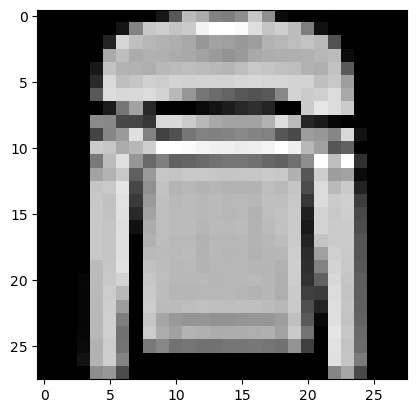

In [42]:
plt.imshow(single_image, cmap='gray')

***Data Preprocessing***

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [20]:
x_train = x_train/255
x_test = x_test/255 

In [21]:
scaled_image = x_train[0]

In [22]:
scaled_image.max()

1.0

In [23]:
scaled_image.min()

0.0

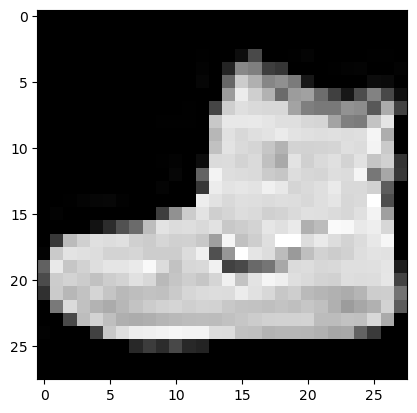

In [41]:
plt.imshow(scaled_image, cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [38]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test = x_test.reshape(10000,28,28,1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
y_train.shape

(60000,)

In [31]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
y_example.shape

(60000, 10)

In [33]:
y_cat_train = to_categorical(y_train,10) 

In [34]:
y_cat_test = to_categorical(y_test,10)

In [35]:
single_image.max()

255

In [36]:
single_image.min()

0

# Modelling 
***TASK 6: Use Keras to create a model consisting of at least the following layers***

In [43]:
model = Sequential() 

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [44]:
model.compile(loss='categorical_crossentropy', 
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [46]:
model.fit(x_train,y_cat_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 25s 13ms/step - loss: 0.4150 - accuracy: 0.8521
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2783 - accuracy: 0.8980
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2377 - accuracy: 0.9136
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2092 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1883 - accuracy: 0.9313
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1685 - accuracy: 0.9388
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1534 - accuracy: 0.9453
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1397 - accuracy: 0.9499
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1273 - accuracy: 0.9546
Epoch 10/10
1875/1875 [==============================] - 24s 1

***Evaluating the Model***

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8978


[0.3443572521209717, 0.8978000283241272]

***Classification***

In [52]:
from sklearn.metrics import classification_report
import numpy as np

In [53]:
predictions = model.predict(x_test)
predictions_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 4ms/step


In [54]:
report = classification_report(y_test, predictions_classes)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.77      0.90      0.83      1000
           3       0.91      0.91      0.91      1000
           4       0.87      0.82      0.85      1000
           5       0.99      0.95      0.97      1000
           6       0.85      0.59      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

